In [103]:
# Necessary Packages are loaded
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
% matplotlib inline

In [104]:
# Social network Ads data is read to study the Age, Gender and their Salaries on purchase
SN_Ads = pd.read_csv("Social_Network_Ads.csv")

In [105]:
SN_Ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [106]:
SN_Ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [107]:
SN_Ads.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


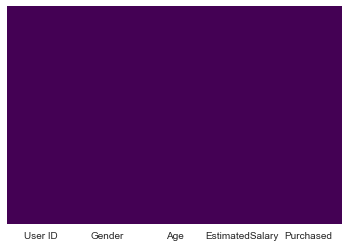

In [108]:
# Heat map of the Data set is generated to visualize and check any missing data.
sns.heatmap(SN_Ads.isnull(),yticklabels=False,cbar=False,cmap='viridis')

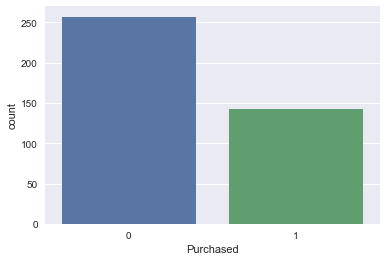

In [109]:
# Below graph is drawn to visualize how many purchased.
sns.countplot(x='Purchased',data=SN_Ads)

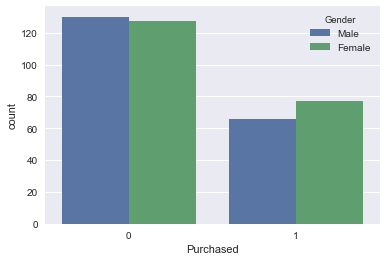

In [110]:
# Belowgraph os drawn to visualixe to see Gender against Purchase  
sns.countplot(x='Purchased',hue='Gender',data=SN_Ads)

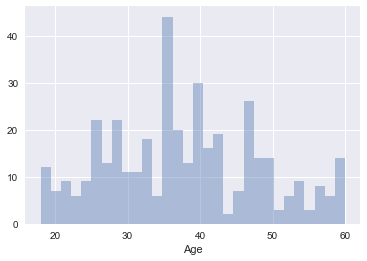

In [111]:
# Below graph is drawn to visualize distribution of age in the date set.
sns.distplot(SN_Ads['Age'].dropna(),kde=False,bins=30)

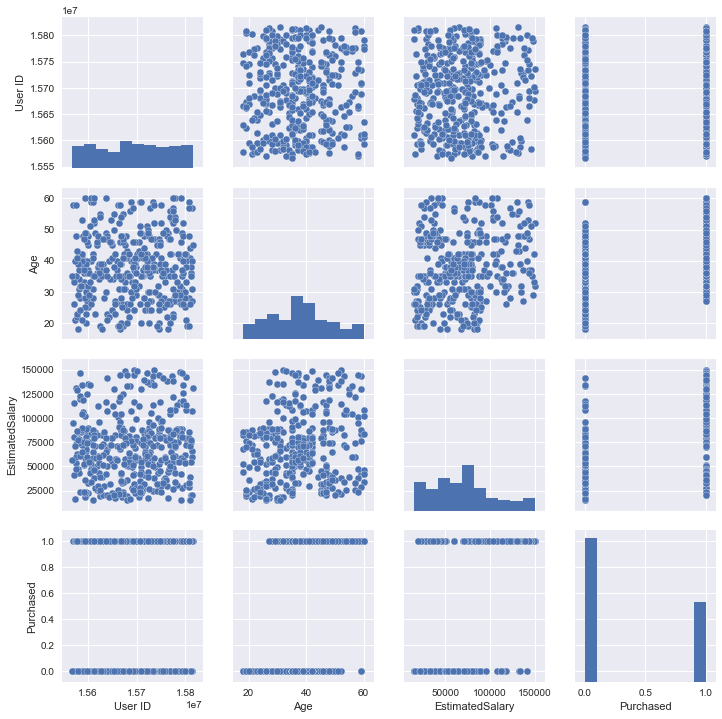

In [112]:
sns.pairplot(SN_Ads)

In [113]:
# Factor variable of Gender is converted into Binary of single variable
sex = pd.get_dummies(SN_Ads['Gender'],drop_first=True)

In [114]:
# Gender variable is dropped and peviously calculated variable 'Sex' is concatenated with original Data set.
SN_Ads.drop(['Gender'],axis=1,inplace=True)
#SN_Ads.drop(['User ID'],axis=1,inplace=True)
SN_Ads = pd.concat([SN_Ads,sex],axis=1)
SN_Ads.head()

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


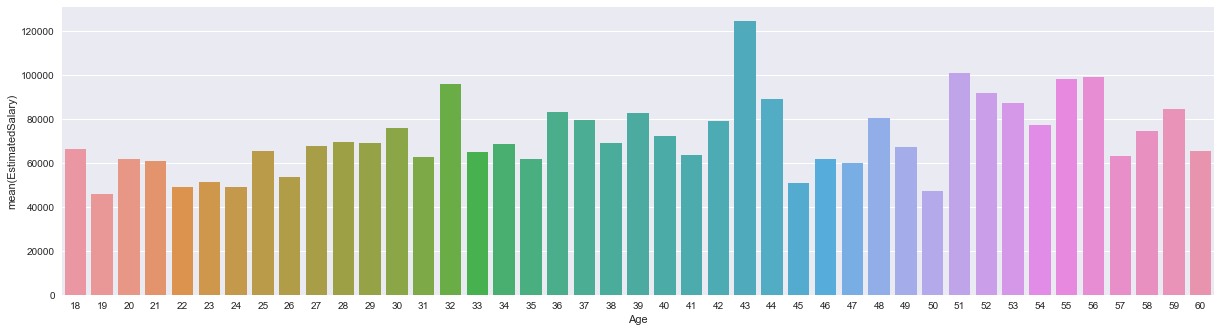

In [115]:
# Below Graph shows average estimated salary for each age in the data set.
SN_Ads_Data = SN_Ads.drop(['User ID'],axis=1)
#SN_Ads_Data.head()
SN_Ads_Mean = SN_Ads_Data.groupby('Age').mean()

SN_Ads_Mean['Age'] = SN_Ads_Mean.index
#SN_Ads_Mean.head()

fig = plt.figure(figsize=(20,5))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
sns.barplot(x='Age',y='EstimatedSalary',data=SN_Ads_Mean)

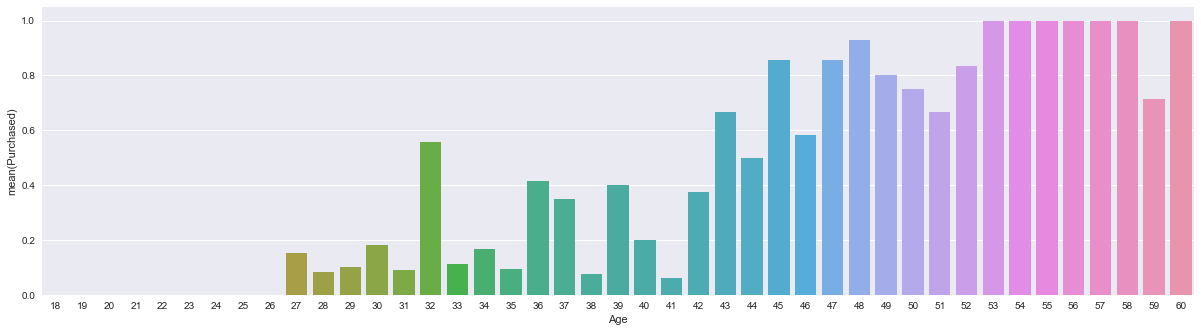

In [116]:
#Below graph shows percenatge of people purchased in each age group 
fig = plt.figure(figsize=(20,5))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
sns.barplot(x='Age',y='Purchased',data=SN_Ads_Mean)

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
# Data set is randomly sampled in to training and testing data set
X_train, X_test, y_train, y_test = train_test_split(SN_Ads.drop('Purchased',axis=1), 
                                                    SN_Ads['Purchased'], test_size=0.30, 
                                                    random_state=101)

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
# Logistic Regression is performed on the training data set
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [121]:
# Target variable is predicted using the model on testinf data set
predictions = logmodel.predict(X_test)

In [122]:
from sklearn.metrics import classification_report

In [123]:
#Classification report of the model is displayed below
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.95      0.87        80
          1       0.84      0.53      0.65        40

avg / total       0.81      0.81      0.79       120



In [124]:
# Accuracy of Predicted vs testing set
metrics.accuracy_score(y_test, predictions)

0.80833333333333335

In [125]:
# Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
probs = logmodel.predict_proba(X_test)
metrics.roc_auc_score(y_test, probs[:, 1])

0.68781249999999994

In [126]:
#Confusion Matrix
metrics.confusion_matrix(y_test, predictions)

array([[76,  4],
       [19, 21]], dtype=int64)

In [127]:
# Logistic Regression Coefficients of the variables
X_train.columns,logmodel.coef_

(Index(['User ID', 'Age', 'EstimatedSalary', 'Male'], dtype='object'),
 array([[ -1.46517456e-07,   3.24505894e-08,   2.42810976e-05,
          -9.11875687e-11]]))

In [128]:
# Model evaluation using 10-fold cross-validation (to see if the accuracy holds up more rigorously)
scores = cross_val_score(LogisticRegression(), X_test, y_test, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[ 0.83333333  0.75        0.83333333  0.83333333  0.75        0.66666667
  0.83333333  0.66666667  0.75        0.75      ]
0.766666666667
